<div style="border:solid Chocolate 2px; padding: 40px">

<b>Анастасия, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю посмотрить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Введение есть, отлично!

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

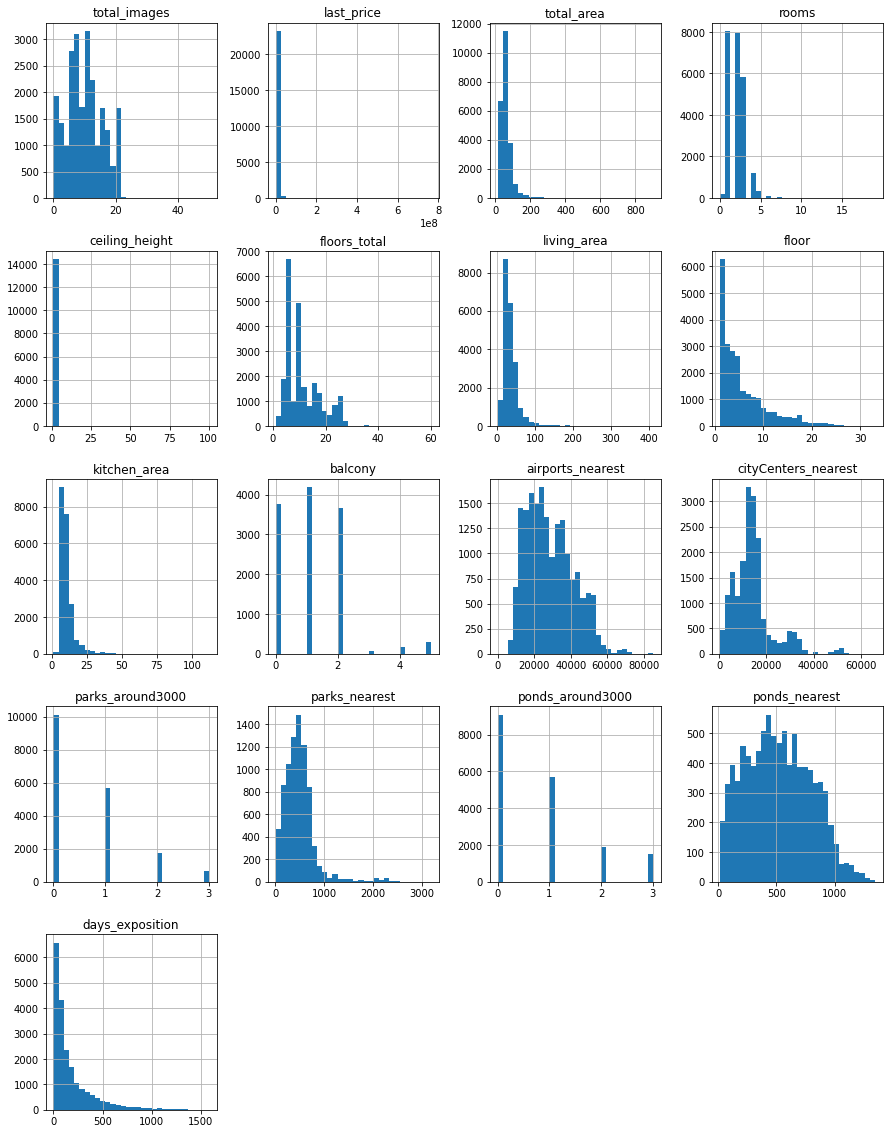

In [4]:
data.hist(bins = 30, figsize=(15, 20))

**Вывод:** наблюдаются пропуски в 14 столбцах из 22, причем в некоторых столбцах количество пропусков достаточно велико, поэтому просто удалить их не получится, нужно будет заменять в соответствии с выбранным принципом. Все данные делятся на две группы: добавленные пользователем и картографические. В связи с этим можно выдвинуть следующие предположение о возникновении пропусков. 
- `ceiling_height` - данные заполнялись пользователем, здесь почти 40% пропусков, что довольно много. На мой взгляд, пропуски возникли из-за того, что пользователь не посчитал нужным заполнять этот пункт, либо же у него не было на руках необходимых бумаг. Если бы человек не знал эту информацию, её можно было бы уточнить в документах на собственность, высота потолка является важным параметром недвижимости, об этом всегда пишут в документах. Предложение по заполнению пропусков в следующем разделе. 
- `floors_total` - странно, что в этом столбце есть пропуски, но с другой стороны, их не много, всего 85, поэтому ими можно пренебречь, то есть удалить.
- `living_area` - возможно, пользователь не стал заполнять этот пункт, потому что забыл, нет под рукой бумаг, либо же в системе этот пункт необязательный. Предложение по заполнению пропусков в следующем разделе. 
- `is_apartment` - параметр-загадка для многих, так начиная выполнять задание, я полезла гуглить строгое определение апартаментов. Оказывается, это нежилая коммерческая недвижимость. Смею предположить, что много людей, так же, как и я не знают этого, поэтому пропустили пункт. Второй вариант: человек знает, что такое апартаменты, но посчитал, что отсутствие значения эквивалентно **не**апартаментам. Пропуски заменим 0.
- `kitchen_area` - аналогично living_area.
- `balcony` - скорее всего отсутсвие значения значит, что балкона попросту нет. Заполним пропуски 0.
- `locality_name` - строки с такими пропусками вообще бесполезны, их всего 49, можно удалить. 
- `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000` - эти данные заполнялись автоматически, поэтому возможно два варианта: либо ошибка системы, либо в базе нет данных. В дальнейшем решено не заполнять пропуски, поскольку значимости в исследовании эти столбцы не несут.
- `airports_nearest`, `cityCenters_nearest` - возможная причина возникновения пропусков аналогична пункту выше. Было выдвинуто предложение: сгруппировать данные по районами, вычислить среднее расстояние до центра/аэропорта для каждого района и в соответствии с ним заполнить пропуски. Далее выяснилось, что не для всех районов указана эта информация, поэтому все пропуски устранить не удалось.  
- `days_exposition`- возможно, объявление еще не закрыто, то есть объект еще не продан, или же владелец продал недвжимость, но забыл снять объявление. При дальнейшем анализе не будем их учитывать, заменим их каким-нибудь большим, выделяющимся числом.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично! Очень подробно прошлись по прпоускам, молодец! Еще бы что-нибдуь сказать о наличии неправильных типов данных, выбросов и аномалий, явных дубликатов

### Предобработка данных

Явных дубликатов не оказалось.

In [5]:
data.duplicated().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> А, вот и проверка дублей) Отлично)

Обработаем столбец `locality_name`. Удалим строки, где нет названия населенного пункта, таких строк всего 49, поэтому удаление не критично. Приведем к одному виду, заменим ё на е, сделаем нижний регистр, выявим неявные дубликаты.

<div class="alert alert-info">
<b> Сделала эту часть кода без if-else. Еще я вручную проверяла все одинаковые имена и являются ли такие населенные пункты(НП) одним и тем же (просто находила одинаковые имена, но с разным названием НП, потом гуглила одно и тоже это или нет).</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Нужно подумать над тем, как это автоматизировать, а то много сил тратишь

Итак, вот следующие названия населенных пунктов, которые двоятся. У них я не буду удалять наименование населенного пункта, чтобы их можно было различать.

    Павлово - городской посёлок, посёлок городского типа, село. Здесь дополнительно соединим первое и второе - это одно и то же.
    Гарболово - деревня, посёлок
    Зимитицы - деревня, посёлок
    Калитино - деревня, посёлок
    Щеглово - деревня, посёлок
    Лесное - посёлок, коттеджный посёлок
    Громово - посёлок, поселок станции громово
    

In [6]:
name_non = ['городской поселок павлово','село павлово','деревня гарболово', 'поселок гарболово','деревня зимитицы',
 'поселок зимитицы','деревня калитино','поселок калитино','деревня щеглово','поселок щеглово', 
 'поселок лесное', 'коттеджный поселок лесное','поселок громово','поселок станции громово'] 
data.loc[data['locality_name'] == 'посёлок городского типа Павлово', 'locality_name'] = 'городской поселок павлово'

In [7]:
data.dropna(subset = ['locality_name'], inplace = True)#удалим строки, где нет названия посёлка, такие в анализе бесполезны
data['locality_name'] = data['locality_name'].str.replace('ё','е')#подготовим для функции строки
data['locality_name'] = data['locality_name'].str.lower()
locality = ['городской поселок ','деревня ', 'коттеджный поселок ',
            'поселок городского типа ','поселок станции ',
            'поселок при железнодорожной станции ',
            'садоводческое некоммерческое товарищество ','садовое товарищество ','село ','поселок ' ]
def clean_name(row):
    for value in locality:
        if value in row:
            return row.replace(value,'')
    return row
data.loc[~data['locality_name'].isin(name_non),'locality_name'] = data.loc[~data['locality_name'].isin(name_non),'locality_name'].apply(clean_name)
data['locality_name'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гатчина', 'гладкое', 'глажево', 'глебычево', 'глинка',
       'гончарово', 'горбунки', 'городской поселок павлово', 'гостилицы',
       'деревня гарболово', 'деревня зимитицы', 'деревня калитино',
       'деревня щеглово', 'дзержинского', 'дружная горка', 'дружноселье',
       'дубровка', 'елизаветино', 'ефимовский', 'жилгородок',
       'жилпоселок', 'житково', 'заводской', '

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А можешь убрать названия типов поселений без if-else? Кстати, вот мы убрали навзания типов поселений, а не было ли среди них поселений с одним названием, но разных по факту? "Село Д" и "дереведя Д", напрмиер

In [8]:
data['locality_name'].isna().sum()

0

Проверим `last_price` на аномалии. Выбивается одно значение 12 190. Скорее всего забыли один нолик. Изменим. Хотя особо на данные это не повлияет.

Есть цены 400 тыс., 500 тыс., но в основном это объекты вне Санкт-петербурга, т.е. в деревнях, селах, что вполне реалистично. 

In [9]:
data['last_price'] = data['last_price'].astype('int64')
data['last_price'].sort_values().unique()

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Цена должна быть целым числом, да)

In [10]:
data.loc[8793,'last_price']*=100

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Можно, наверное даже не на 10, а больше

In [11]:
data['last_price'].sort_values().unique()

array([   430000,    440000,    450000, ..., 401300000, 420000000,
       763000000])

Пропуски в столбце `balcony` интерпретируем как отсутствие балкона, поэтому заменяем их на 0.

In [12]:
data['balcony'].fillna(0, inplace = True)
data['balcony'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю!

`celling_height` - высота потолков, здесь целых 9160 пропусков, это почти 40%. Удалять эти строки нельзя, поскольку они составляют внушительную часть данных. Проверим данные на наличие аномалий. Были выявлены такие значения, как 1, 1.2, 22.6, 24, 25, 26, 27, 27.5, 32, 100. Это точно **очепятки**, потолок в 100 м что-то из разряда фантастики, скорее всего это пентхаус с потолком в 10 м, аналогично значения от 20 и выше выглядят неправдоподобно, в таких строках следует заменить значения, поделив их на 10. 

In [13]:
data['ceiling_height'].isna().sum()

9160

In [14]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [15]:
def norm_height(value):
    if value > 20:
        value = value / 10
    return value
data['ceiling_height'] = data['ceiling_height'].apply(norm_height)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Тоже поддерживаю)

In [16]:
data.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,0.0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,0.0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,0.0,санкт-петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [17]:
data = data.drop(index = [5712,16934,22590]).reset_index(drop= True )

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Можно, но не забывай сбрасывать индексы

<div class="alert alert-info">
<b> Сбросила)</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично)

Строк с потолками ниже 2 м всего три, поэтому их можно удалить.

In [18]:
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,
        2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,

Чем заменять пропуски? Промониторив стандарты высоты потолков, я выяснила следующее: эконом-дома обладают стандартом 2.55-2.6 м, в квартире бизнес-класса высота начинается с 2,7 м, в элитных квартирах – с 3 м, в пентхаусах варьируется в пределах от 3 до 12 м. Также надо принять во внимание историческую часть Санкт-Петербурга (центр), здесь высота потолков обычно более 3 м. Было принято решение заменять пропуски следующим образом: разделим все жилье на группы (историческое, элитное, бизнес, эконом). Если расстояние до центра меньше 4500 м (проверила по карте), то будем считать жилье историческим, иначе расчитываем среднюю цену за квадратный метр:
>эконом - <= 110 тыс. руб. за метр

>бизнес - <= 200 тыс. руб. за метр

>элита - > 200 тыс. руб. за метр

In [19]:
data['total_area'] = data['total_area'].round(2)
data['price_one_m'] = data['last_price'] / data['total_area']
def status(value, price):
    if value <= 4500:
        return 'историческое' 
    else:
         if price <= 110000:
            return 'эконом'
         elif 110000 < price <= 200000: 
            return 'бизнес'
         elif price > 200000:
            return 'элита'    
data['status'] = data.apply(lambda x: status(x['cityCenters_nearest'], x['price_one_m']), axis=1)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Идею понял, есть вопрсо по написанию функции. А разве у тебя не должено быть следующим образом, не буду писать весь код, только смысл покажу:
        
        if value <= 4500:
            return 'историческое' 
        else:
             if price <= 110000:
                return 'эконом'
             elif 110000 < price <= 200000: 
                return 'бизнес'
             elif price > 200000:
                return 'элита'           

<div class="alert alert-info">
<b> Согласна, так будет правильнее, исправила.</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

In [20]:
mean_height = data.groupby('status')['ceiling_height'].mean()#средняя высота потолка по типу жилья 
mean_height

status
бизнес          2.780543
историческое    3.172556
эконом          2.652079
элита           3.160463
Name: ceiling_height, dtype: float64

In [21]:
def nan_ceil(height, status):
    for sts in mean_height.index:
        if pd.isna(height) and status == sts:
            return mean_height[sts]
    return height
data['ceiling_height'] = data.apply(lambda x: nan_ceil(x['ceiling_height'], x['status']), axis=1).round(2)

In [22]:
data['ceiling_height'].isna().sum()

0

Перейдем к `floors_total`. Здесь 85 пропусков, что незначительно для общего объема данных, поэтому просто удалим их.

In [23]:
data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Можно, согласен

`is_apartment` - здесь всего 2760 заполненных значений. Сделаем этот столбец типа **bool** и будем считать, что 1 - True - апартаменты; 0 - False - не апартаменты. Заменим nan на 0.

In [24]:
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')
data['is_apartment'].unique()

array([False,  True])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Тоже можно)

In [25]:
data['is_apartment'].isna().sum()

0

Рассмотрим столбцы `parks_around3000`, `ponds_around3000`, скорее всего пропуски возникли из-за того, что либо собственник просто не знает количество прудов, парков в районе 3 км, либо их просто нет. Эти столбцы не слишком важны в исследовании, поэтому заполним пропуски 0. Пропуски в `parks_nearest`, `ponds_nearest` не влияют на исследование, поэтому не будем их заполнять.

In [26]:
data['parks_around3000'].fillna(0, inplace = True)
data['ponds_around3000'].fillna(0, inplace = True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> И тоже поддерживаю!

Проверим `total_area` на наличие аномалий.

In [27]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Как видим, есть площади, не похожие на площадь квартиры. Заменим данные в апартаментах, если общая площадь больше 500, будем считать, что это апартаменты.

In [28]:
data.loc[data['total_area']>=500, 'is_apartment'] = True

In [29]:
data.query('total_area >300').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,status
155,8,96000000,317.00,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,False,...,санкт-петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,302839.116719,историческое
581,20,65000000,365.00,2019-03-18T00:00:00,7,2.90,7.0,NaN,7,False,...,санкт-петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,178082.191781,историческое
660,3,49950000,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,False,...,санкт-петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,103223.806572,историческое
793,20,135000000,310.00,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,False,...,санкт-петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,435483.870968,элита
866,5,25000000,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,False,...,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,68870.523416,эконом
1026,20,155000000,310.00,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,False,...,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,500000.000000,элита
1085,16,75000000,323.00,2017-07-10T00:00:00,5,4.00,5.0,255.7,4,False,...,санкт-петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0,232198.142415,историческое
1387,20,59800000,399.00,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,False,...,санкт-петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,149874.686717,бизнес
1493,10,65000000,364.00,2018-11-27T00:00:00,7,3.90,6.0,250.0,3,False,...,санкт-петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0,178571.428571,историческое
2241,9,130278280,304.00,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,False,...,санкт-петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0,428546.973684,элита


Заполним пропуски в `cityCenters_nearest` и `airports_nearest` средним по району. Как видим, заполнить пропуски мы сможем только в 25 районах, об остальных данных нет. 

In [30]:
mean_center_near = data.groupby('locality_name')['cityCenters_nearest'].mean()
print('Всего ',mean_center_near.shape[0], 'значений.')
print('Пропусков ', mean_center_near.isna().sum(),'.')
print(mean_center_near.sort_values())

Всего  312 значений.
Пропусков  287 .
locality_name
санкт-петербург    11587.757265
парголово          19924.776758
стрельна           23374.302326
шушары             24243.387615
левашово           25727.000000
                       ...     
юкки                        NaN
ялгино                      NaN
яльгелево                   NaN
ям-тесово                   NaN
янино-1                     NaN
Name: cityCenters_nearest, Length: 312, dtype: float64


In [31]:
mean_airport_near = data.groupby('locality_name')['airports_nearest'].mean()
print('Всего ',mean_airport_near.shape[0], 'значений.')
print('Пропусков ', mean_airport_near.isna().sum(),'.')
print(mean_airport_near.sort_values(ascending = False).head(16))

Всего  312 значений.
Пропусков  287 .
locality_name
молодежное         84430.200000
зеленогорск        73300.250000
кронштадт          67469.263158
репино             62293.250000
белоостров         57769.000000
сестрорецк         56640.486339
лисий нос          55302.333333
песочный           54565.500000
парголово          53994.926606
левашово           52693.000000
ломоносов          48308.280303
петергоф           40184.676617
саперный           34142.666667
понтонный          30581.400000
стрельна           28145.395349
санкт-петербург    28040.557597
Name: airports_nearest, dtype: float64


In [32]:
def nan_near(name, near, mean):
    for value in mean.index:
        if pd.isna(near) and name == value:
            return mean[value]
    return near
data['cityCenters_nearest'] = data.apply(lambda x: nan_near(x['locality_name'], x['cityCenters_nearest'],mean_center_near), axis=1)
data['airports_nearest'] = data.apply(lambda x: nan_near(x['locality_name'], x['airports_nearest'], mean_airport_near), axis=1)

Разберемся с `days_exposition`. Пропуски скорее всего означают, что объявление еще не закрыто, то есть объект еще не продан, или же владелец продал недвжимость, но забыл снять объявление. При дальнейшем анализе не будем их учитывать, заменим на какое-то большое число, выбивающееся из общей картины. 

In [33]:
data['days_exposition'].isna().sum()

3171

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно, но я бы не стла менять ни на какое число пропуск) Ну есть он и есть, твоя гипотза по его поялвению верна

Самое интересное, `living_area`, `kitchen_area`. Пропуски можно заполнить следующим образом. 

Расчитаем медианный процент отношения a = `living_area`/`total_area` и, исходя из него, будем расчитывать `living_area` = a*`total_area`.

Для `kitchen_area` в студиях поставим 0. Для **не студий** расчитаем медианный процент b = `kitchen_area`/`total_area` и в пропусках будем вставлять b* `total_area`.

In [34]:
data['living_area'] = data['living_area'].round(2)

In [35]:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А у апартаменов в жилой площади тоже 0 ставятся, да? По кухонной понятно, а вот по жилой я не уверен, но может ошибаюсь, ты мне подскажешь, правда?

<div class="alert alert-info">
<b> Я тут глубже изучила вопрос про апартаменты. Оказалось, в них может быть и жилая площадь, если это не офисы, и даже кухонная, отличие в возможности регистрации, в апартаментах нельзя прописаться. Поэтому я думаю, что для апартаментов тоже можно считать как для обычных квартир. Со студиями оставим также, будем считать, что кухонной площади нет.</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, отлично)

In [36]:
proc_for_kitch = (data.loc[data['studio'] == False, 'kitchen_area'] \
/ data.loc[data['studio'] == False, 'total_area']).median()
proc_for_kitch

0.17236013964894478

In [37]:
proc_for_liv = (data['living_area'] \
/ data['total_area']).median()
proc_for_liv

0.5681818181818182

In [38]:
data['living_area'].fillna(data['total_area']*proc_for_liv, inplace = True)

In [39]:
data['kitchen_area'].fillna(data['total_area']*proc_for_kitch, inplace = True)

<div class="alert alert-info">
<b> Здесь проверяю, что сумма не больше общей площади.</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

In [40]:
def check(a,b,c):
    if a+b>c:
        return c-b
    else:
        return a
data['living_area'] = data.apply(lambda x: check(x['living_area'], x['kitchen_area'], x['total_area']), axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23562 entries, 0 to 23646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23562 non-null  int64  
 1   last_price            23562 non-null  int64  
 2   total_area            23562 non-null  float64
 3   first_day_exposition  23562 non-null  object 
 4   rooms                 23562 non-null  int64  
 5   ceiling_height        23562 non-null  float64
 6   floors_total          23562 non-null  float64
 7   living_area           23562 non-null  float64
 8   floor                 23562 non-null  int64  
 9   is_apartment          23562 non-null  bool   
 10  studio                23562 non-null  bool   
 11  open_plan             23562 non-null  bool   
 12  kitchen_area          23562 non-null  float64
 13  balcony               23562 non-null  float64
 14  locality_name         23562 non-null  object 
 15  airports_nearest   

Итак, везде, где возможно, пропуски заполнены, изучены аномалии, отброшены бесполезные данные. Перейдем к смене типа данных.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Заполнения по коэффициентам хороши, молодец

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Не забудь только проверить, не превышает ли у нас сумма площадей всю площадь

По причине удобства восприятия, упрощения вычислений и логической очевидности следует сменить тип данных в следующих столбцах:
- first_days_exposition - сменить на datetime
- floors_total - с float на int
- balcony - с float на int
- parks_around3000, ponds_around3000 - с float на int
- days_exposition - с float на int

In [42]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['days_exposition'].fillna(55555555, inplace = True)#поставим такое значение заместо nan, чтобы заменить тип данных\
#и не учитывать в дальнейшем такую аномалию
data['days_exposition'] = data['days_exposition'].astype('int64')
data['living_area'] = data['living_area'].round(2)
data['price_one_m'] = data['price_one_m'].astype('int64')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично, верно)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23562 entries, 0 to 23646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23562 non-null  int64         
 1   last_price            23562 non-null  int64         
 2   total_area            23562 non-null  float64       
 3   first_day_exposition  23562 non-null  datetime64[ns]
 4   rooms                 23562 non-null  int64         
 5   ceiling_height        23562 non-null  float64       
 6   floors_total          23562 non-null  int64         
 7   living_area           23562 non-null  float64       
 8   floor                 23562 non-null  int64         
 9   is_apartment          23562 non-null  bool          
 10  studio                23562 non-null  bool          
 11  open_plan             23562 non-null  bool          
 12  kitchen_area          23562 non-null  float64       
 13  balcony         

In [44]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,status
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,55555555,120370,бизнес
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920,эконом
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,эконом
3,0,64900000,159.00,2015-07-24,3,3.16,14,90.34,9,False,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,элита
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,эконом
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,янино-1,NaN,NaN,0,NaN,0,NaN,55,95065,эконом
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195,эконом
7,5,7915000,71.60,2019-04-18,2,2.78,24,40.68,22,False,...,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,55555555,110544,бизнес
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,мурино,NaN,NaN,0,NaN,0,NaN,189,87454,эконом
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524,эконом


**Вывод**: итак, все логически заменяемые и важные для исследования пропуски заполнены в соответствии с выбранным мной принципом. Пропуски в не особо значимых столбцах были оставлены как есть. Пропуски в определенных столбцах, составляющие маленькую часть от всех данных или же не несущие смысла для исследования, было решено удалить. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> В целом работу поддерживаю! 

### Посчитайте и добавьте в таблицу новые столбцы

Ранее создали столбец `price_one_m` - цена за один квадратный метр.

Последовательно создадим столбцы с указанием дня, месяца, года первой публикации.

In [45]:
data['first_day_week'] = data['first_day_exposition'].dt.weekday
data['first_month'] = data['first_day_exposition'].dt.month
data['first_year'] = data['first_day_exposition'].dt.year

Определимся с типом этажа, нас будет интересовать группировка на первый, последний, другой.

In [46]:
def what_is_floor(floor, total_floor):
    if floor == 1:
        return 'первый'
    elif floor == total_floor:
        return 'последний'
    else:
        return 'другой'
data['type_of_floor'] = data.apply(lambda x: what_is_floor(x['floor'], x['floors_total']), axis=1)

Добавим в таблицу колонку `tocenter_in_km` - расстояние до центра в км.

In [47]:
data['tocenter_in_km'] = (data['cityCenters_nearest']/1000)

In [48]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_m,status,first_day_week,first_month,first_year,type_of_floor,tocenter_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,55555555,120370,бизнес,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81,82920,эконом,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558,92785,эконом,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,3.16,14,90.34,9,False,...,3,234.0,424,408176,элита,4,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000,эконом,1,6,2018,другой,8.098


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбцы добавлены верно, молодец

### Проведите исследовательский анализ данных

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'></font>
    <br />
    <font color='4682B4'>В задании говорится о квартирах, заведем новый датафрем без апартаментов.</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Это ты ловко подметила, давай)

In [49]:
data_new =  data[data['is_apartment'] == False]
data_new.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_m,status,first_day_week,first_month,first_year,type_of_floor,tocenter_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,55555555,120370,бизнес,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81,82920,эконом,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558,92785,эконом,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,3.16,14,90.34,9,False,...,3,234.0,424,408176,элита,4,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000,эконом,1,6,2018,другой,8.098


#### Площади

Как видим, средняя общая площадь составляет 60 м2, минимальное и максимальное значения соответственно 12 и 900. Для жилой площади характерно среднее около 34 кв.м., для площади кухни 10 кв.м. Построим диаграммы размаха и гистограммы для лучшей демонстрации. 

In [50]:
area = pd.DataFrame()
area['total_area'] = data_new['total_area'].describe()
area['living_area'] = data_new['living_area'].describe()
area['kitchen_area'] = data_new['kitchen_area'].describe()
area

,total_area,living_area,kitchen_area
count,23504.000000,23504.000000,23504.000000
mean,60.088328,34.423142,10.425396
std,33.968761,21.551464,5.923826
min,12.000000,2.000000,0.000000
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.000000
75%,69.600000,42.012500,12.000000
max,495.000000,347.500000,107.000000


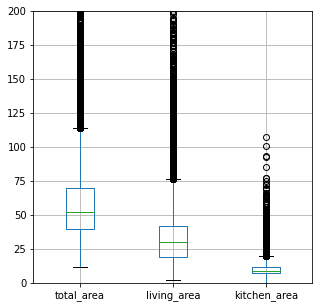

In [51]:
data_new.boxplot(column=['total_area', 'living_area', 'kitchen_area'],figsize=(5,5)) 
plt.ylim(0,200)
plt.show()

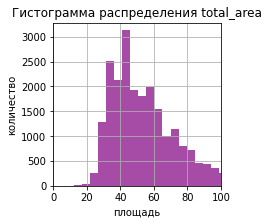

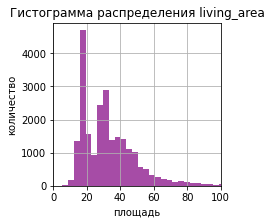

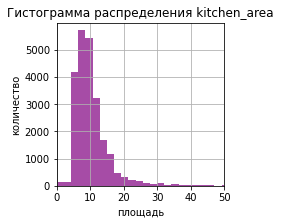

In [52]:
for value in area.columns:
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_title(f'Гистограмма распределения {value}')
    ax.grid()
    ax.set_xlim([0, 100])
    plt.xlabel('площадь')
    plt.ylabel('количество')
    if value == 'kitchen_area':
        ax.set_xlim([0, 50])
        plt.hist(data_new[value], bins=50, color='purple', alpha = 0.7)
    else:
        plt.hist(data_new[value], bins=100, color='purple', alpha = 0.7)
    plt.show()

**Вывод**: диаграмма размаха и гистограммы показали, что с увеличением любой площади, количество недвижимости становится всё меньше. Большинство общих площадей квартир находятся в промежутке от 20 до 100, для жилой площади от 20 до 40, кухни в промежутке от 7 до 12.

#### Цена объекта

In [53]:
data_new['last_price'].describe()

count    2.350400e+04
mean     6.465490e+06
std      1.015080e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.620000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

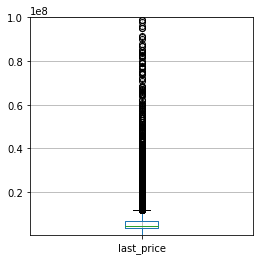

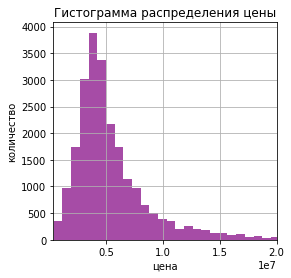

In [54]:
data_new.boxplot(column=['last_price'], figsize = (4,4)) 
plt.ylim(400000,100000000)
plt.show()
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Гистограмма распределения цены')
ax.grid()
plt.hist(data_new['last_price'], bins=1000, color='purple', alpha = 0.7)
ax.set_xlim([400000, 20000000])
plt.xlabel('цена')
plt.ylabel('количество')
plt.show()

**Вывод**: гистограмма демонстрирует нормальное распределение цены недвижимости. Смущает один момент, средняя цена составляет 6.5 млн, когда медианное значение 4.6. Возможно такой разброс из-за аномальных значений цены, в выборке есть значение 763 млн! Возможно, в дальнейшем следует исключить слишком большие цены из рассмотрения.

#### Количество комнат

In [55]:
data_new['rooms'].describe()

count    23504.000000
mean         2.068627
std          1.070988
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

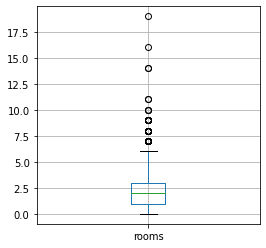

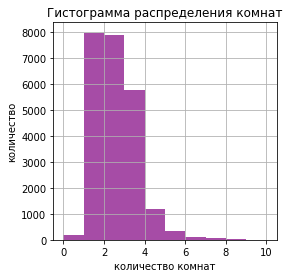

In [56]:
data_new.boxplot('rooms', figsize = (4,4))
plt.show()
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Гистограмма распределения комнат')
ax.grid()
plt.hist(data_new['rooms'], bins=10, color='purple', alpha = 0.7, range =(0,10))
plt.xlabel('количество комнат')
plt.ylabel('количество')
plt.show()

<AxesSubplot:ylabel='rooms'>

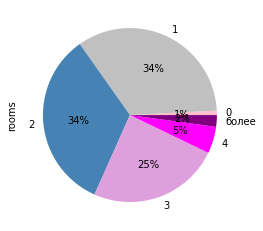

In [57]:
colors = ['pink', 'silver', 'steelblue','plum','magenta','purple']
room_group = data_new.groupby('rooms')['rooms'].count()
room_group
S=0
for value in room_group[5:]:
    S+=value
room_group[5] = S
room_group = room_group[0:6]
room_group.index = ['0','1','2','3','4','более']
room_group.plot.pie(y='rooms', figsize=(4, 4),autopct='%1.0f%%', colors = colors)

**Вывод**: как видим, количество однокомнатных и двухкомнатных примерно одинаковое и равно 8 тысяч, таких квартир большинство, трехкомнатных квартир чуть меньше 6 тысяч. Наблюдается отрицательная динамика: чем больше комнат, тем реже значения.

#### Высота потолков

In [58]:
data_new['ceiling_height'].describe()

count    23504.000000
mean         2.722650
std          0.281727
min          2.000000
25%          2.600000
50%          2.650000
75%          2.780000
max         20.000000
Name: ceiling_height, dtype: float64

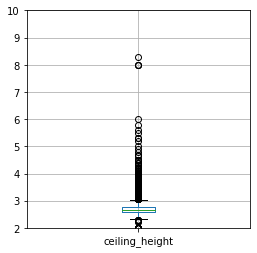

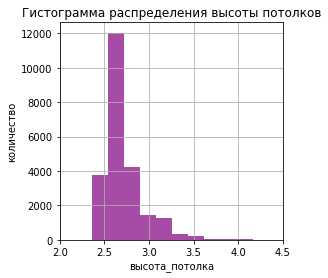

In [59]:
data_new.boxplot('ceiling_height', figsize = (4,4))
plt.ylim(2,10)
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Гистограмма распределения высоты потолков')
ax.grid()
plt.hist(data_new['ceiling_height'], bins=100, color='purple', alpha = 0.7)
plt.xlim(2,4.5)
plt.xlabel('высота_потолка')
plt.ylabel('количество')
plt.show()

**Вывод**: квартиры с потолками примерно 2.6 - 2.7 м. лидируют. Предсказуемо, раннее разбирались с потолками детальнее. 

#### Этажи

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'></font>
    <br />
    <font color='4682B4'>Исследуем распределение этажа недвижимости.</font>
</div>

In [60]:
data_new['floor'].describe()

count    23504.000000
mean         5.880786
std          4.872200
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

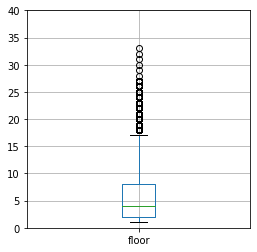

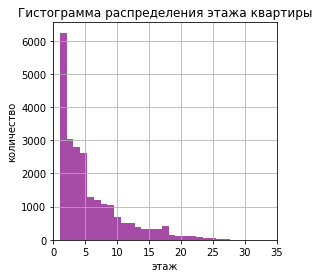

In [61]:
data_new.boxplot('floor', figsize = (4,4))
plt.ylim(0,40)
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Гистограмма распределения этажа квартиры')
ax.grid()
plt.hist(data_new['floor'], bins=30, color='purple', alpha = 0.7)
plt.xlim(0,35)
plt.xlabel('этаж')
plt.ylabel('количество')
plt.show()

**Вывод**: преобладают нижние этажи, так среднее значение почти 6, а медианное 4. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'></font>
    <br />
    <font color='4682B4'>Исследуем тип этажа квартиры.</font>
</div>

<AxesSubplot:ylabel='type_of_floor'>

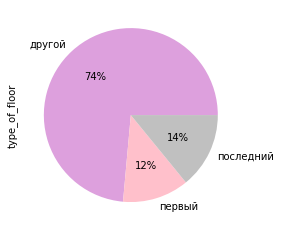

In [62]:
colors = ['plum','pink', 'silver']
data_new.groupby('type_of_floor')['type_of_floor'].count().plot\
.pie(y='rooms', figsize=(4, 4),autopct='%1.0f%%', colors = colors)

**Вывод**: не первые/не последние этажи составляют большую часть данных.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'></font>
    <br />
    <font color='4682B4'>Исследуем этажность домов.</font>
</div>

In [63]:
data_new['floors_total'].describe()

count    23504.000000
mean        10.683969
std          6.593033
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

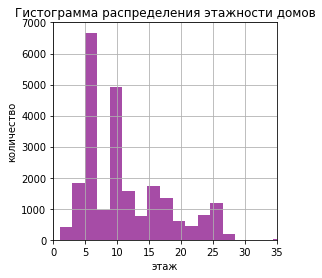

In [64]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Гистограмма распределения этажности домов')
ax.grid()
plt.hist(data_new['floors_total'], bins=30, color='purple', alpha = 0.7)
plt.xlim(0,35)
plt.xlabel('этаж')
plt.ylabel('количество')
plt.show()

**Вывод**: как видим, среднее составляет 10 этажей, а медиана 9, почти близко)

#### День и месяц продажи

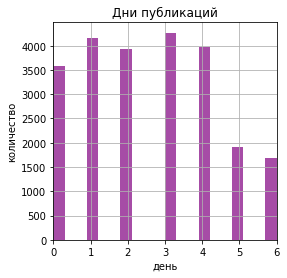

In [65]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
ax.set_title('Дни публикаций')
plt.hist(data_new['first_day_week'], bins=20, color='purple', alpha = 0.7)
plt.xlim(0,6)
plt.xlabel('день')
plt.ylabel('количество')
plt.show()

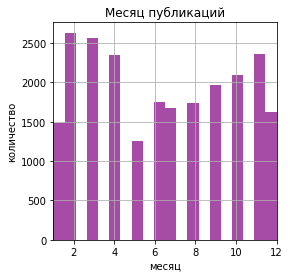

In [66]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
ax.set_title('Месяц публикаций')
plt.hist(data_new['first_month'], bins=20, color='purple', alpha = 0.7)
plt.xlim(1,12)
plt.xlabel('месяц')
plt.ylabel('количество')
plt.show()

In [67]:
data_new.groupby('first_month')['first_month'].count()

first_month
1     1482
2     2631
3     2569
4     2349
5     1259
6     1745
7     1677
8     1735
9     1971
10    2099
11    2357
12    1630
Name: first_month, dtype: int64

**Вывод**: заметим, что больше всех объявлений давалось во вторник и четверг, т.е. среди недели. Довольно предсказуемо, ведь на выходных хочется отдыхать=) Самыми "публикационными" месяцами оказались февраль и март. К концу года и к началу следующего значения примерно одинаковые, а вот к середине года наблюдается снижение количества публикаций. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличные исследования параметров! Глубоко окунулись, не забыли про подписи для графиков, про важные численные значения, такие как среднее и медиана. Молодец! Еще можешь попробовать здесь поопределять типы распределний для интереса

### Как быстро продавались квартиры (days_exposition)?

Ранее я отмечала, что пропуски в `days_exposition` будет некорректно заполнять чем-то имеющим смысл. Так было принято решение заполнить их каким-то очень большим числом (55555555), чтобы в этом исследовании корректно интерпретировать результат. Возможно, эти пропуски означают, что объявление еще не снять с публикации.

In [68]:
data_day = data_new.query('days_exposition < 55555555')
data_day['days_exposition'].describe()

count    20348.000000
mean       180.621781
std        219.313427
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

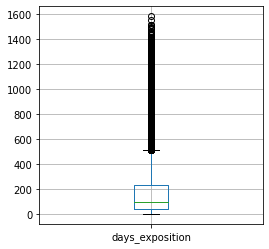

In [69]:
data_day.boxplot('days_exposition', figsize=(4,4))

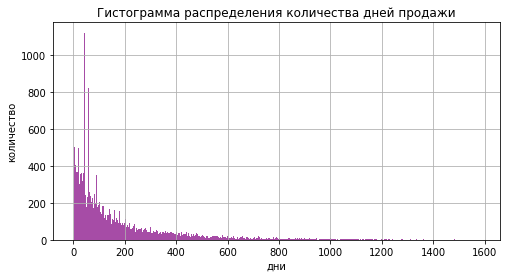

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Гистограмма распределения количества дней продажи')
ax.grid()
plt.hist(data_day['days_exposition'], bins=500, color='purple', alpha = 0.7)
plt.xlabel('дни')
plt.ylabel('количество')
plt.show()

Проверим, как быстро продавались квартиры. Для этого посчитаем количество объектов в квартилях. 

In [71]:
print('Количество квартир, проданных за первые 1.5 месяца: ', data_day[data_day['days_exposition'] <= 45].shape[0])
print('Количество квартир, проданных за первые 3 месяца: ', data_day[data_day['days_exposition'] <= 95].shape[0])
print('Количество квартир, проданных за первые 7.5 месяца: ', data_day[data_day['days_exposition'] <= 231].shape[0])
print('Количество квартир, проданных за первые 1.5 года: ', data_day[data_day['days_exposition'] <= 550].shape[0])

Количество квартир, проданных за первые 1.5 месяца:  5933
Количество квартир, проданных за первые 3 месяца:  10192
Количество квартир, проданных за первые 7.5 месяца:  15267
Количество квартир, проданных за первые 1.5 года:  18895


**Вывод**: медианное значение продажи квартир составляет 95 дней ~ 3 месяца, тогда как среднее 180 дней ~ полгода.  Скорее всего такой разброс возникает из-за большого количества объявлений, которые висят больше 400 дней. 

За первые 1.5 месяца продалось почти 6 тысяч квартир, в следующие 1.5 месяца чуть меньше- 4 тысячи, в следующие 4.5 месяца 5 тысяч. В итоге за примерно 1.5 года было продано почти 19 тысяч. 
Проанализировав диаграмму размаха можно сказать, что 500 с лишним дней ~ 1.5 года (судим по краям усов) - это срок, в который квартира с большой вероятностью продастся. 

С другой стороны, наблюдаем отрицательную динамику продаж, то есть с каждым месяцем количество продаж становится все меньше. 

На мой взгляд, продажу в первые 1.5 месяца можно считать "быстрой", а вот более 1.5 года "необычайно медленной". 

Хотелось бы обратить внимание на пики, которые возникают в самом начале и как будто бы с определенным периодом. Проверим...

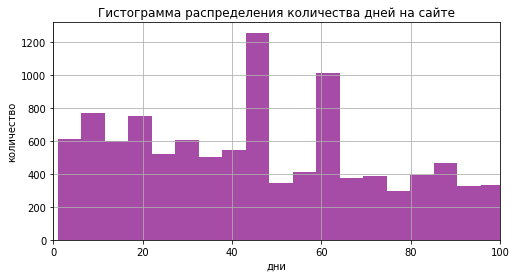

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Гистограмма распределения количества дней на сайте')
ax.grid()
plt.hist(data_day['days_exposition'], bins=300, color='purple', alpha = 0.7)
plt.xlim(0,100)
plt.xlabel('дни')
plt.ylabel('количество')
plt.show()

Самые большие пики наблюдаются около 45-50 и около 60 дней  с момента публикации. Возможно, это особенности сервиса, на авито, например, спустя месяц объявление архивируется, если его не продлить. Может быть у яндекс.недвижимости тоже есть такая фишка.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вновь глубоко окунулись, провели большую работу. Я обычно здесь говорю о том, что лекго определить квантили, на которых лежат быстыре и необычно медленные продажи. Быстрые, наверное, на 20-25%, необычно медленные на 85-90%

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Здесь будем использовать подчищенный исходный датафрейм data.

#### Зависимость цены от общей площади

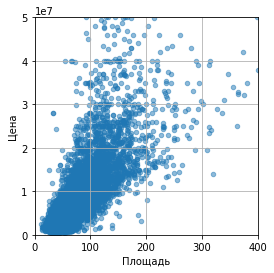

In [73]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter',
                                    figsize=(4, 4),grid=True, alpha = 0.5)
plt.xlim(0, 400)
plt.ylim(0,50000000)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

Дополнительно посчитаем коэффициент корреляции для всех данных и для 'total_area' < 150.

In [74]:
data['total_area'].corr(data['last_price'])

0.6536259616247682

In [75]:
data.loc[data['total_area']<150, 'total_area'].corr(data.loc[data['total_area']<150, 'last_price'])

0.6961104550043432

**Вывод**: как видим, до 150 м2 зависимость почти линейная, т.е. с увеличением площади растет и цена на квартиру. После 150 начинается сильный разброс. 

Дополнительная проверка состояла в расчете коэффициента корреляции, до 150 м2 коэффициент почти равен **0.7**, для всех данных **0.65**, что является доказательством существования линейной связи.

#### Зависимость цены от жилой площади

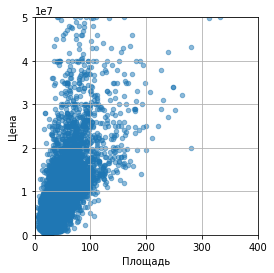

In [76]:
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter',
                                     figsize=(4, 4),grid=True, alpha = 0.5)
plt.xlim(0, 400)
plt.ylim(0,50000000)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

**Вывод**: диаграмма рассеяния для жилой площади похожа на диаграмму для общей площади. Здесь аналогично до определенного момента наблюдается линейная связь. Посчитаем коэффициент корреляции. Здесь он похуже, чем в предыдущем случае.

In [77]:
data['living_area'].corr(data['last_price'])

0.5852996807304326

#### Зависимость цены от площади кухни

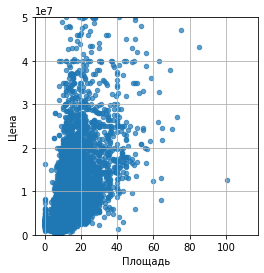

In [78]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter',
                                       figsize=(4, 4), alpha = 0.7, grid = True)
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.ylim(0,50000000)
plt.show()

In [79]:
data['kitchen_area'].corr(data['last_price'])

0.5119738606515833

**Вывод**: здесь рассеивание происходит раньше, есть некоторые нулевые значения, но скорее всего они соответствуют апартаментам без кухни, либо студиям. Коэффициент корреляции показывает не такую сильную зависимость, как в двух предыдущих случаях.

#### Зависимость цены от количества комнат

(0.0, 50000000.0)

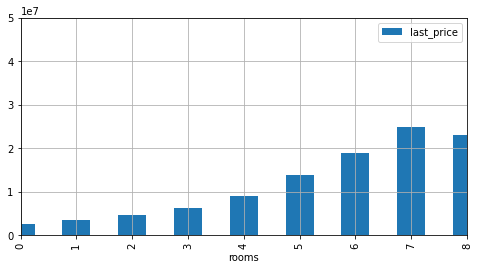

In [80]:
pd.pivot_table(data, index = 'rooms', values = 'last_price',
               aggfunc = 'median').plot(kind = 'bar', figsize = (8,4), grid = True)
plt.xlim(0,8)
plt.ylim(0,5*10**7)

**Вывод**: на графике выведены значения до 8, поскольку дальше происходят нетипичные скачки. Как видим, вплоть до 7 комнат происходит положительная динамика, то есть с увеличение количества комнат растет и цена, что предсказуемо. 

#### Зависимость цены от типа этажа

<AxesSubplot:xlabel='type_of_floor'>

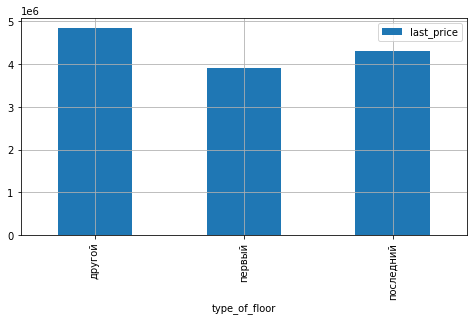

In [81]:
pd.pivot_table(data, index = 'type_of_floor', values = 'last_price',
               aggfunc = 'median').plot(kind = 'bar', figsize = (8,4), grid = True)

**Вывод**: цены за квартиру на первом этаже ниже остальных, что вполне объяснимо. Квартиры на первом этаже обычно холоднее, поскольку под ними находится подвал, из которого может ползти всякая неприятная живность, что также является большим минусом. Еще первый этаж проигрывает в шумоизоляции, каждый звук с улицы и с лестничной площадки, через которую проходят все жильцы, будет более чувстивительным для жильца, чем для соседей выше. Обычно собственник понимает все недостатки такой недвижимости и устанавливает цену ниже, чем у квартир выше.

Последний этаж также не рекордсмен в цене. В зависимости от сезона все температуры ощущаются острее, возможны проблемы с крышей.

Таким образом, цена на "других" этажах превышает цену за первый и последний этаж.

#### Зависимость цены от дня недели, месяца, года публикации

<AxesSubplot:xlabel='first_day_week'>

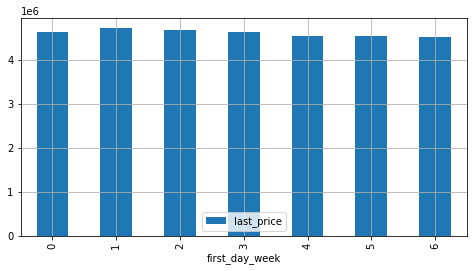

In [82]:
data.pivot_table(index='first_day_week', values='last_price', aggfunc=('median')).plot(
    kind='bar', figsize=(8, 4), grid=True)

**Вывод**: наблюдаем незначительные отличия между днями публикации. Цена во вторник и четверг здесь тоже (ранее рассматривалось количество) чуть больше остальных. Дни недели слишком "маленький" параметр, чтобы это глобально повлияло на цену. Интересно посмотреть на месяц и год.

<AxesSubplot:xlabel='first_month'>

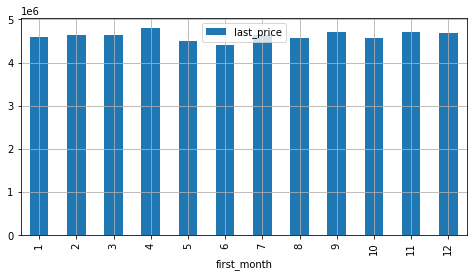

In [83]:
data.pivot_table(index='first_month', values='last_price', aggfunc=('median')).plot(
    kind='bar', figsize=(8, 4), grid=True)

**Вывод**: ранее рассмотрено количество публикаций в каждый месяц, было обнаружено снижение публикаций к середине года, то есть к лету (июнь). Здесь мы наблюдаем самую низкую цену также в июне.  

Хочется отметить начало и конец года, здесь более менее одинаковая цена, обычно в эти отезки года спрос на квартиры не такой большой, поэтому и цену повышать/снижать не имеет особого смысла. Всё же небольшие изменения в цене можно объяснить сезоном/несезоном.

<AxesSubplot:xlabel='first_year'>

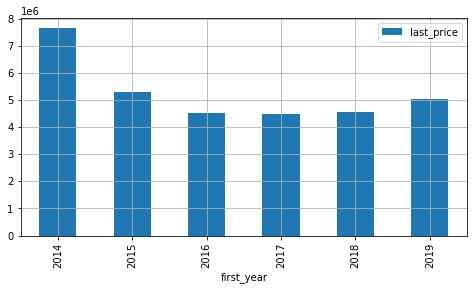

In [84]:
data.pivot_table(index='first_year', values='last_price', aggfunc=('median')).plot(
    kind='bar', figsize=(8, 4), grid=True)

<AxesSubplot:xlabel='first_year'>

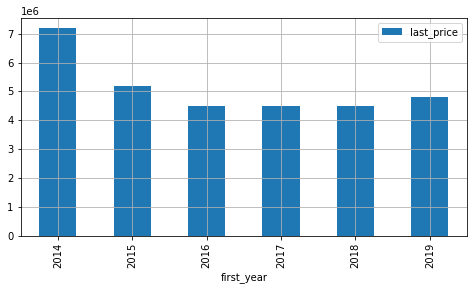

In [85]:
data[data['days_exposition'] < 55555555].pivot_table(index='first_year', values='last_price', aggfunc=('median')).plot(
    kind='bar', figsize=(8, 4), grid=True)

**Вывод**: в 2014 году цены на квартиры были выше последующих годов, возможной причиной мог стать кризис 2014-2015. Были построены две диаграммы, первая с учетом замененных пропусков на большое число, вторая без их учета. Как видим, особо график не изменился. За последние в данных года медианная за год цена варьировалась от 4.5 до 5 млн.

<AxesSubplot:>

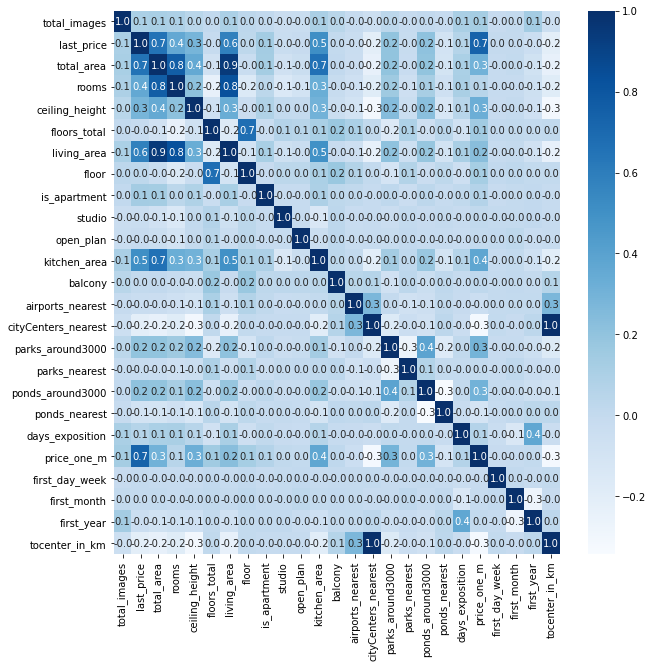

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt='.1f')

#### Общий вывод

Итак, были исследованы зависимости цены недвижимости от таких параметров, как общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, а также дня недели, месяца, года публикации. В ходе анализа были использованы диаграммы рассеяния, столбчатыые диаграммы, хитмэп. Для дополнительной сверки вычислялся коэффициент корреляции и матрица корреляции. По матрице можно сказать, что неплохая корреляция между ценой и общей площадью, жилой площадью, а также ценой за один квадратный метр, что подтверждается диаграммами рассеяния.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> По зависимостям тоже все правильно!

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Заведем список топ-10 районов по количеству объявлений

In [87]:
top_ten = data['locality_name'].value_counts().head(10).index

In [88]:
data.query('locality_name in @top_ten').pivot_table(index = 'locality_name', values = 'price_one_m', 
                                                    aggfunc = 'mean').sort_values(by = 'price_one_m', 
                                                                                  ascending = False)


,price_one_m
locality_name,
санкт-петербург,114870.301042
пушкин,103125.373984
кудрово,95260.393617
парголово,90175.489297
мурино,86040.658703
шушары,78550.883827
колпино,75424.150888
гатчина,68745.693811
всеволожск,68654.007538


**Вывод**: оказалось, что в Выборге самая низкая средняя цена за квадратный метр среди топ-10 по количеству объявлений. Предсказуемо Санкт-Петербург обладает самой высокой средней ценой 114870 т.р.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Правильно)

### Средняя цена каждого километра

In [89]:
data['tocenter_in_km'] = data['tocenter_in_km'].round(0)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_m,status,first_day_week,first_month,first_year,type_of_floor,tocenter_in_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,55555555,120370,бизнес,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81,82920,эконом,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.0,558,92785,эконом,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,3.16,14,90.34,9,False,...,3,234.0,424,408176,элита,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000,эконом,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,55,95065,эконом,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,155,99195,эконом,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.78,24,40.68,22,False,...,0,NaN,55555555,110544,бизнес,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,NaN,189,87454,эконом,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,88524,эконом,6,2,2017,другой,15.0


In [90]:
every_km_price = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'tocenter_in_km', values = 'last_price', aggfunc = 'mean')

<AxesSubplot:xlabel='tocenter_in_km'>

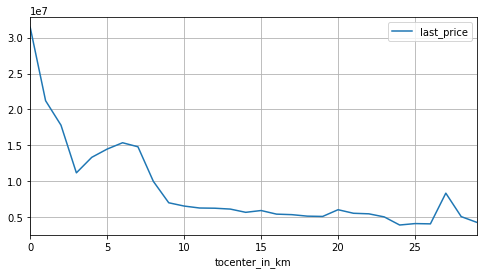

In [91]:
every_km_price.plot(xlim = (0,29),figsize = (8,4), grid = True)

**Вывод**: на графике наблюдается падение цены каждого километра за исключением от 3 до примерно 8 км, здесь вогнутость вверх. Вообще следует насторожиться, однако! я проанализировала элитные жк Санкт-Петербурга(например, Петроградский район), не все находятся в центре, а некоторые находятся как раз в промежутке от 3 до 8 км. Возможно, именно в этой связи наблюдается такой "горбик" у графика. Предполагаю, что по этой же причине горбик ближе к 29 км.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

### Общий вывод

Подведем итоги. Проведен анализ рынка недвижимости Санкт-Петербурга и Ленинградкой области с целью нахождения интересных особенностей и зависимостей. Было поставлено несколько основных вопросов:
> Как быстро продавались квартиры?

В первые 1.5 месяца продается больше всего квартир, около 6000, с каждым месяцем продается все меньше квартир, но за 1.5 года продалось почти 19000 квартир.

> Какие факторы больше всего влияют на цену недвижимости?

Выяснилось, что главными ценообразующими параметрами являются общая площадь, жилая площадь, количество комнат, этаж. Чем больше общая и жилая площадь, а соответственно и больше комнат, тем больше цена. 

Тип этажа влияет следующим образом: самыми дешевыми квартирами оказались те, что на первом этаже, следом идут квартиры на последнем этаже. Дороже всех не первый и не последний.  

День недели значительно не влияет на ценообразование, единственное - вторник и четверг - это дни, когда квартиры публикуются чуть больше остальных и цены чуть выше остальных.
Зависимость от месяца заметна лучше. Так к середине года цены становятся ниже, однако и публикуют в это время меньше. Зима - конец и начало года- время, когда рынок недвижимости в стагнации, особо цены не изменяются. Выше всех цены выставляют в апреле. Зависимость от года публикации следующая, в 2014 году былы максимальные цены, возможно из-за кризиса, после этого постепенно цены снижались.

>Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?

Выяснилось, что лидирует по цене Санкт-Петербург, здесь средняя цена за один квадратный метр составляет почти 115 т.р., далее город Пушкин - 103 т.р., на 10-м месте оказался Выборг - 58 т.р.

> Средняя цена каждого километра?

Наблюдалось падение цены с каждым километром, самые большие цены в центре. Обнаружились некоторые скачки в районе 3-8 км, но выдвинуто предположение, что это элитные ЖК, расположенные на таком расстоянии от центра, ведь не все ЖК строят близко к исторической части Санкт-Петербурга, некоторые предпочитают жить дорого и подальше от центра - в тишине и спокойствии.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Итоговый вывод полностью отражает проделанную работу

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Анастасия, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. На желтые комменты, так как критических ошибок нет, это отлично!)
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
 Анастасия, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод